<a href="https://colab.research.google.com/github/ekomation/research/blob/main/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
def split(df,label):
    X_tr, X_te, Y_tr, Y_te = train_test_split(df.iloc[:, :-1], label, test_size=0.25, random_state=42)
    return X_tr, X_te, Y_tr, Y_te

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score


classifiers = ['Logistic', 'Support vector Machine', 'KNeighbors']



In [3]:
models = [LogisticRegression(max_iter = 1000),
          svm.SVC(kernel='rbf'),
          KNeighborsClassifier()]

In [4]:
def acc_score(df,label):
    Score = pd.DataFrame({"Classifier":classifiers})
    j = 0
    acc = []
   # X = df.iloc[:, : -1]
    X_train,X_test,Y_train,Y_test = split(df,label)
    for i in models:
        model = i
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        acc.append(accuracy_score(Y_test,predictions))
        j = j+1     
    Score["Accuracy"] = acc
    Score.sort_values(by="Accuracy", ascending=False,inplace = True)
    Score.reset_index(drop=True, inplace=True)
    #joblib.dump(model, 'diabetes_prediction_model.joblib')
    return Score


In [5]:
def plot(score,x,y,c = "b"):
    gen = [1,2,3,4,5]
    plt.figure(figsize=(6,4))
    ax = sns.pointplot(x=gen, y=score,color = c )
    ax.set(xlabel="Generation", ylabel="Accuracy")
    ax.set(ylim=(x,y))

In [6]:
def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=np.bool)     
        chromosome[:int(0.3*n_feat)]=False             
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population



In [7]:
def fitness_score(population):
    scores = []
    for chromosome in population:
        logmodel.fit(X_train.iloc[:,chromosome],Y_train)         
        predictions = logmodel.predict(X_test.iloc[:,chromosome])
        scores.append(accuracy_score(Y_test,predictions))
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)                                    
    return list(scores[inds][::-1]), list(population[inds,:][::-1]) 



In [8]:
def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen


In [9]:
def crossover(pop_after_sel):
    pop_nextgen = pop_after_sel
    for i in range(0,len(pop_after_sel),2):
        new_par = []
        child_1 , child_2 = pop_nextgen[i] , pop_nextgen[i+1]
        new_par = np.concatenate((child_1[:len(child_1)//2],child_2[len(child_1)//2:]))
        pop_nextgen.append(new_par)
    return pop_nextgen


In [10]:
def mutation(pop_after_cross,mutation_rate,n_feat):   
    mutation_range = int(mutation_rate*n_feat)
    pop_next_gen = []
    for n in range(0,len(pop_after_cross)):
        chromo = pop_after_cross[n]
        rand_posi = [] 
        for i in range(0,mutation_range):
            pos = randint(0,n_feat-1)
            rand_posi.append(pos)
        for j in rand_posi:
            chromo[j] = not chromo[j]  
        pop_next_gen.append(chromo)
    return pop_next_gen

In [11]:
def generations(df,label,size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, Y_train, Y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print('Best score in generation',i+1,':',scores[:1])  #2
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate,n_feat)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

In [12]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_data.csv to diabetes_data.csv


In [13]:
data_db = pd.read_csv("diabetes_data.csv").sample(frac = 1).reset_index(drop = True).drop([])
label_db = data_db["CLASS"]


print("Diabetes disease dataset:\n",data_db.shape[0],"Records\n",data_db.shape[1],"Features")


Diabetes disease dataset:
 1000 Records
 14 Features


In [14]:
#data cleaning
data_db['CLASS'] = [2 if CLASS.strip() == 'Y' else 0 if CLASS.strip() == 'N' else 1 for CLASS in data_db['CLASS']]
data_db['Gender'] = [0 if Gender.strip() in ['f', 'F'] else 1 if Gender.strip() == 'M' else None for Gender in data_db['Gender']]

In [15]:
data_db.head(8)

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,416,24110,1,55,5.7,76,6.8,5.5,1.5,0.7,4.1,0.7,29.0,2
1,488,5609,1,55,4.6,77,6.5,6.0,1.5,1.3,4.1,0.6,30.0,2
2,74,65632,0,55,3.7,41,10.8,5.4,2.2,1.2,3.3,1.0,35.0,2
3,163,34348,1,61,4.7,58,6.4,4.4,2.1,0.7,2.9,0.9,26.0,2
4,293,24069,0,66,14.1,146,8.7,5.8,3.3,1.0,3.4,1.5,33.0,2
5,33,23982,1,62,4.1,63,9.5,3.6,5.1,0.9,2.5,0.9,30.0,2
6,781,34580,1,61,7.2,78,9.1,6.5,1.5,1.4,0.9,0.5,33.0,2
7,745,34499,1,53,7.5,230,11.6,9.1,1.5,1.4,2.1,7.0,27.0,2


In [16]:
# Split dataset into input and output variables
X = data_db.iloc[:, 0:13]
Y = data_db.iloc[:, 13]



In [17]:
#performing feature selection to pick the mose prevalent variables
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)

# Train a decision tree classifier on the training set
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

# Print the feature importances
print("Feature importances:\n{}".format(dtc.feature_importances_))

# Select the most important features
important_features = [i for i in dtc.feature_importances_.tolist() if i > 0.0]
#X_train_reduced = X_train[:, important_features]
#X_test_reduced = X_test[:, important_features]

Feature importances:
[0.00906384 0.         0.         0.00487462 0.         0.
 0.35691356 0.07158108 0.04473818 0.         0.         0.
 0.51282872]


In [18]:
reduced_data = data_db[['Gender', 'AGE', 'HbA1c', 'Chol', 'TG', 'VLDL', 'BMI', 'CLASS']]

In [19]:
#predicting the result using K-means classifier
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
#Preparing the dataset
X = reduced_data.drop("CLASS", axis = 1)

In [32]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [35]:
scatterKnn = X.copy()

In [36]:
scatterKnn

array([[ 0.87744601,  0.16737086, -0.58480636, ..., -0.31533956,
        -0.11653849,  0.41058438],
       [ 0.87744601,  0.16737086, -0.70325535, ..., -0.34264878,
         0.08507822,  0.41058438],
       [-1.13967126,  0.16737086,  0.99451352, ..., -0.2334119 ,
         1.09316178,  0.41058438],
       ...,
       [-1.13967126, -0.62855036, -0.58480636, ..., -0.2334119 ,
        -0.92300534,  0.41058438],
       [ 0.87744601,  0.16737086,  0.32330257, ..., -0.15148424,
        -0.11653849,  0.41058438],
       [-1.13967126,  0.16737086,  0.44175156, ..., -0.45188565,
         0.08507822,  0.41058438]])

In [22]:
X = pd.DataFrame(X)

In [23]:
X.columns = reduced_data.drop("CLASS", axis = 1).columns

In [24]:
X

,Gender,AGE,HbA1c,Chol,TG,VLDL,BMI
0,0.877446,0.167371,-0.584806,0.489729,-0.606658,-0.315340,-0.116538
1,0.877446,0.167371,-0.703255,0.874023,-0.606658,-0.342649,0.085078
2,-1.139671,0.167371,0.994514,0.412870,-0.106828,-0.233412,1.093162
3,0.877446,0.849589,-0.742738,-0.355718,-0.178232,-0.260721,-0.721389
4,-1.139671,1.418104,0.165371,0.720306,0.678620,-0.096866,0.689928
...,...,...,...,...,...,...,...
995,0.877446,0.053668,-0.032044,-1.969754,-1.177893,-0.424576,0.891545
996,0.877446,-0.060035,-0.189976,0.028576,-0.178232,-0.260721,0.689928
997,-1.139671,-0.628550,-0.584806,-0.355718,-0.035424,-0.233412,-0.923005
998,0.877446,0.167371,0.323303,1.335176,0.393002,-0.151484,-0.116538


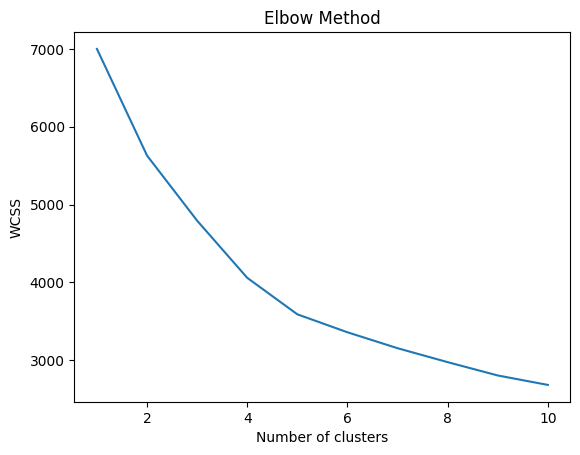

In [25]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [26]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [ ]:
labels = kmeans.predict(X)
reduced_means = X.copy()

In [ ]:
reduced_means['Cluster'] = labels

In [27]:
reduced_means = pd.DataFrame(X)

In [28]:
reduced_means['CLASS'] = reduced_data.CLASS

In [29]:
reduced_means.columns = reduced_data.columns

In [53]:
reduced_means

,Gender,AGE,HbA1c,Chol,TG,VLDL,BMI,CLASS
0,0.877446,0.167371,-0.584806,0.489729,-0.606658,-0.315340,-0.116538,2
1,0.877446,0.167371,-0.703255,0.874023,-0.606658,-0.342649,0.085078,2
2,-1.139671,0.167371,0.994514,0.412870,-0.106828,-0.233412,1.093162,2
3,0.877446,0.849589,-0.742738,-0.355718,-0.178232,-0.260721,-0.721389,2
4,-1.139671,1.418104,0.165371,0.720306,0.678620,-0.096866,0.689928,2
...,...,...,...,...,...,...,...,...
995,0.877446,0.053668,-0.032044,-1.969754,-1.177893,-0.424576,0.891545,2
996,0.877446,-0.060035,-0.189976,0.028576,-0.178232,-0.260721,0.689928,2
997,-1.139671,-0.628550,-0.584806,-0.355718,-0.035424,-0.233412,-0.923005,2
998,0.877446,0.167371,0.323303,1.335176,0.393002,-0.151484,-0.116538,2


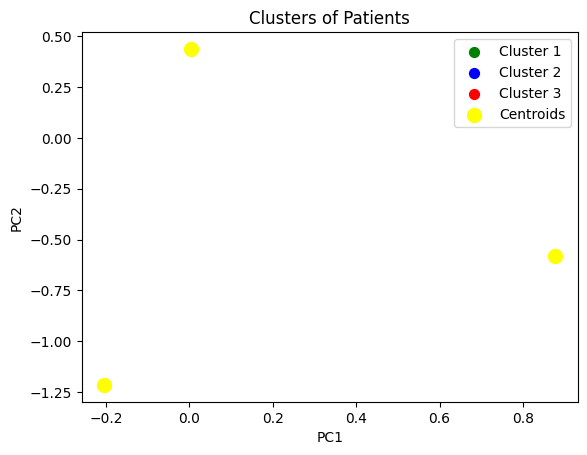

In [40]:
#visualizing gthe result
plt.scatter(scatterKnn[label_db == 0, 0], scatterKnn[label_db == 0, 1], s = 50, c = 'green', label = 'Cluster 1')
plt.scatter(scatterKnn[label_db == 1, 0], scatterKnn[label_db == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(scatterKnn[label_db == 2, 0], scatterKnn[label_db == 2, 1], s = 50, c = 'red', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Patients')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
data_with_scale = reduced_means.copy()

In [43]:
data_with_scale

,Gender,AGE,HbA1c,Chol,TG,VLDL,BMI,CLASS
0,0.877446,0.167371,-0.584806,0.489729,-0.606658,-0.315340,-0.116538,2
1,0.877446,0.167371,-0.703255,0.874023,-0.606658,-0.342649,0.085078,2
2,-1.139671,0.167371,0.994514,0.412870,-0.106828,-0.233412,1.093162,2
3,0.877446,0.849589,-0.742738,-0.355718,-0.178232,-0.260721,-0.721389,2
4,-1.139671,1.418104,0.165371,0.720306,0.678620,-0.096866,0.689928,2
...,...,...,...,...,...,...,...,...
995,0.877446,0.053668,-0.032044,-1.969754,-1.177893,-0.424576,0.891545,2
996,0.877446,-0.060035,-0.189976,0.028576,-0.178232,-0.260721,0.689928,2
997,-1.139671,-0.628550,-0.584806,-0.355718,-0.035424,-0.233412,-0.923005,2
998,0.877446,0.167371,0.323303,1.335176,0.393002,-0.151484,-0.116538,2


In [44]:
data_with_scale = scaler.fit_transform(data_db)

In [45]:
unscaled_data = reduced_data

In [46]:
unscaled_acc = acc_score(unscaled_data, label_db)

In [47]:
unscaled_acc

,Classifier,Accuracy
0,Logistic,0.908
1,KNeighbors,0.904
2,Support vector Machine,0.880


In [61]:
scaled_data = pd.DataFrame(X)

In [63]:
scaled_data.columns = reduced_data.columns

In [64]:
scaled_data

,Gender,AGE,HbA1c,Chol,TG,VLDL,BMI,CLASS
0,0.877446,0.167371,-0.584806,0.489729,-0.606658,-0.315340,-0.116538,0.410584
1,0.877446,0.167371,-0.703255,0.874023,-0.606658,-0.342649,0.085078,0.410584
2,-1.139671,0.167371,0.994514,0.412870,-0.106828,-0.233412,1.093162,0.410584
3,0.877446,0.849589,-0.742738,-0.355718,-0.178232,-0.260721,-0.721389,0.410584
4,-1.139671,1.418104,0.165371,0.720306,0.678620,-0.096866,0.689928,0.410584
...,...,...,...,...,...,...,...,...
995,0.877446,0.053668,-0.032044,-1.969754,-1.177893,-0.424576,0.891545,0.410584
996,0.877446,-0.060035,-0.189976,0.028576,-0.178232,-0.260721,0.689928,0.410584
997,-1.139671,-0.628550,-0.584806,-0.355718,-0.035424,-0.233412,-0.923005,0.410584
998,0.877446,0.167371,0.323303,1.335176,0.393002,-0.151484,-0.116538,0.410584


In [65]:
scaled_data['CLASS'] = reduced_data.CLASS

In [66]:
scaled_data.columns = reduced_means.columns

In [52]:
scaled_data

,0,1,2,3,4,5,6,7,CLASS
0,0.877446,0.167371,-0.584806,0.489729,-0.606658,-0.315340,-0.116538,0.410584,2
1,0.877446,0.167371,-0.703255,0.874023,-0.606658,-0.342649,0.085078,0.410584,2
2,-1.139671,0.167371,0.994514,0.412870,-0.106828,-0.233412,1.093162,0.410584,2
3,0.877446,0.849589,-0.742738,-0.355718,-0.178232,-0.260721,-0.721389,0.410584,2
4,-1.139671,1.418104,0.165371,0.720306,0.678620,-0.096866,0.689928,0.410584,2
...,...,...,...,...,...,...,...,...,...
995,0.877446,0.053668,-0.032044,-1.969754,-1.177893,-0.424576,0.891545,0.410584,2
996,0.877446,-0.060035,-0.189976,0.028576,-0.178232,-0.260721,0.689928,0.410584,2
997,-1.139671,-0.628550,-0.584806,-0.355718,-0.035424,-0.233412,-0.923005,0.410584,2
998,0.877446,0.167371,0.323303,1.335176,0.393002,-0.151484,-0.116538,0.410584,2


In [67]:
scaled_acc = acc_score(scaled_data, label_db)

In [68]:
scaled_acc

,Classifier,Accuracy
0,Support vector Machine,0.920
1,Logistic,0.904
2,KNeighbors,0.900


In [69]:
X_train, X_test, Y_train, Y_test = split(scaled_data, label_db)

In [71]:
X_train

,Gender,AGE,HbA1c,Chol,TG,VLDL,BMI
82,0.877446,0.167371,-0.426874,-1.278024,-0.321041,-0.288030,0.085078
991,-1.139671,-1.765581,-1.256017,-1.431742,-0.820871,-0.369958,-1.729472
789,-1.139671,1.418104,0.086405,-0.509436,-0.963680,-0.397267,-0.721389
894,-1.139671,0.281074,-0.426874,1.258318,0.750024,-0.178793,0.689928
398,0.877446,-1.424472,-0.940153,-0.125142,2.106706,0.148917,-1.729472
...,...,...,...,...,...,...,...
106,-1.139671,-0.401144,-1.492915,-1.124307,-1.177893,-0.424576,-1.527855
270,0.877446,1.986619,-0.505840,2.026906,-0.463850,-0.342649,0.085078
860,0.877446,0.053668,0.718133,0.259153,-0.035424,-0.206103,0.689928
435,0.877446,-0.173738,0.007439,1.488894,0.964237,-0.069557,-0.116538


In [72]:
testmodel = LogisticRegression(max_iter = 1000)
testmodel.fit(X_train, Y_train)
y_pred = testmodel.predict(X_test)

In [73]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
cm = confusion_matrix(Y_test, y_pred, labels = ['Y', 'N', 'P'])

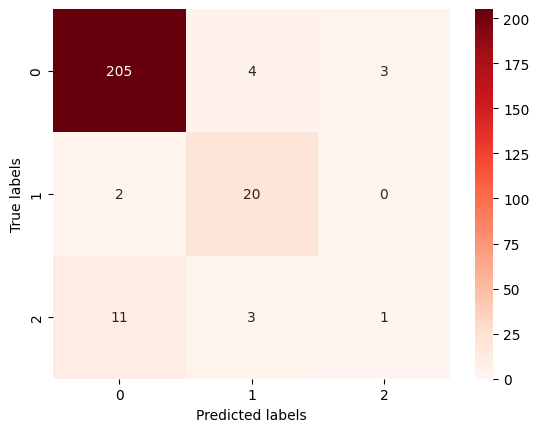

In [75]:
# Create a heatmap to visualize the confusion matrix
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [76]:
print(cm)

[[205   4   3]
 [  2  20   0]
 [ 11   3   1]]


In [77]:
logmodel = LogisticRegression(max_iter = 1000)

In [78]:
X_train, X_test, Y_train, Y_test = split(scaled_data, label_db)

In [79]:
chromo_df_bc,score_bc=generations(scaled_data,label_db,size=80,n_feat= X_train.shape[1], n_parents=64,mutation_rate=0.20,n_gen=5, X_train = X_train,X_test = X_test,Y_train = Y_train,Y_test = Y_test)

Best score in generation 1 : [0.916]
Best score in generation 2 : [0.92]
Best score in generation 3 : [0.916]
Best score in generation 4 : [0.92]
Best score in generation 5 : [0.92]


In [80]:
X_train.columns

Index(['Gender', 'AGE', 'HbA1c', 'Chol', 'TG', 'VLDL', 'BMI'], dtype='object')

In [82]:
def demo():
  arr = []
  gender = float(input('Please input your gender here : (0 for female, 1 for male) '))
  age = float(input('Enter your age here: (Max: 80, Min 20) '))
  HbA1c = float(input('Input your average blood sugar level for the past 2 - 3 months: (Max: 16, Min 0.9) '))
  Chol = float(input('Input your level of cholesterol here: (Max: 10.3, Min: 0) '))
  TG = float(input("Enter your triglycerides here: (Min : 0.3, Max 13.8) "))
  VLDL = float(input('Enter the value of low density lipoprotein : (Max:35, Min 0.1) '))
  BMI = float(input("Enter the value of the body mass index: (Max : 47.75, Min : 19) "))
  arr.append([gender, age, HbA1c, Chol, TG, VLDL, BMI])
  model = LogisticRegression(max_iter = 1000)
  model.fit(X_train, Y_train)
  result = model.predict(arr)
  print(" ")
  print("Below are the details of your diabetes test result ")
  print("")
  print("")
  print("Age : ", age)
  print("HbA1c : ", HbA1c)
  print("Cholesterol : ", Chol)
  print("TG : ", TG)
  print("VLDL : ", VLDL)
  print("BMI : ", BMI)
  print("")
  print("")
  print("Diabetes Status : ", ["Positive" if result == 'P' else "Negative" if result == 'N' else "Pre-diabetes" for result in result])

In [ ]:
demo()